In [180]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import scipy.stats

In [153]:
# Read the Better Life Index data 
bli=pd.read_csv("data/BLI.CSV", thousands=',')

In [154]:
# Read GDP per capita data from IMF. Remember that its in Tab Delimited format.
gdp=pd.read_csv("data/WEO_Data.csv", thousands=',')

In [164]:
# Rename column "Value" to "Life_Satisfaction"
bli.rename(columns={"Value" : "Life_Satisfaction"}, inplace=True)

In [165]:
# Data Prep
bli = bli[['Country','Life_Satisfaction']]
gdp = gdp[['Country','GDP']]
df = pd.merge(bli,gdp, on='Country', how = 'left')

In [166]:
#drop nulls
df = df.dropna()

In [167]:
#Check for Duplicates
duplicateDFRow = df[df.duplicated(['Country'])]
print(duplicateDFRow)

Empty DataFrame
Columns: [Country, Life_Satisfaction, GDP]
Index: []


In [183]:
# Pearson Correlation with P-value
x = df["GDP"]
y = df["Life_Satisfaction"]
corr = scipy.stats.pearsonr(x,y)
corr

(0.7128283232856584, 2.463161651131159e-07)

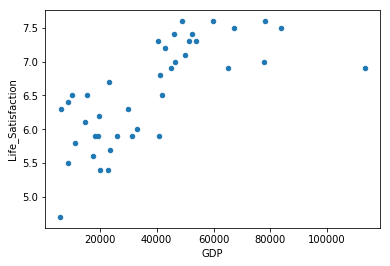

In [171]:
# Data Viz
df.plot(kind='scatter', x='GDP', y ='Life_Satisfaction')
plt.show()

In [172]:
# Linear regression
model = sklearn.linear_model.LinearRegression()

In [173]:
#train
x = np.c_[df["GDP"]]
y = np.c_[df["Life_Satisfaction"]]
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [174]:
#The model will predict the Life satisfaction metric based on GDP.
#Make a prediction. Lets pick Afghanistan. GDP = 513.108
x_new = [[513.108]]
print(model.predict(x_new))

[[5.71360561]]
